#**Navinet - Automated Pothole Detection Using Image Processing Techniques**



By:

Vinusha C V - 23MAI1006

Ramya R - 23MAI1016

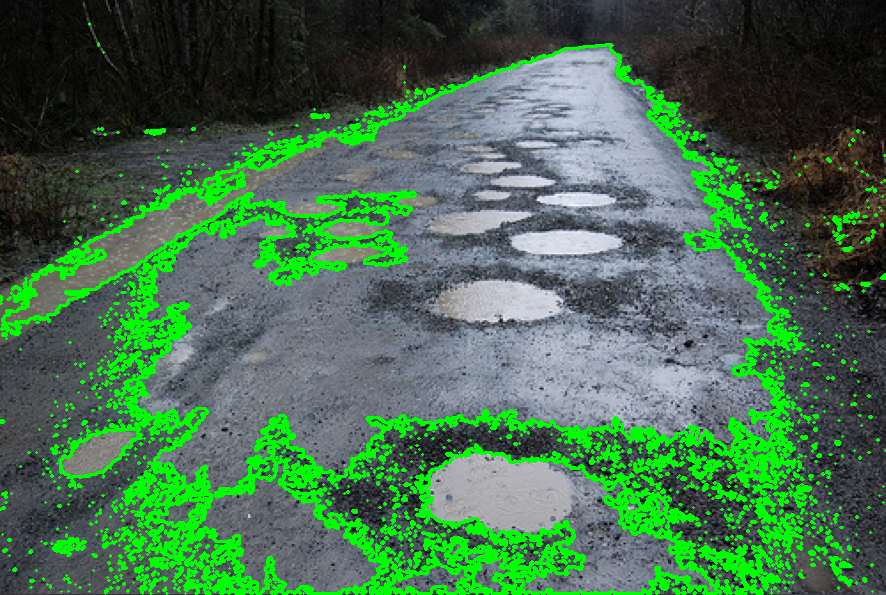

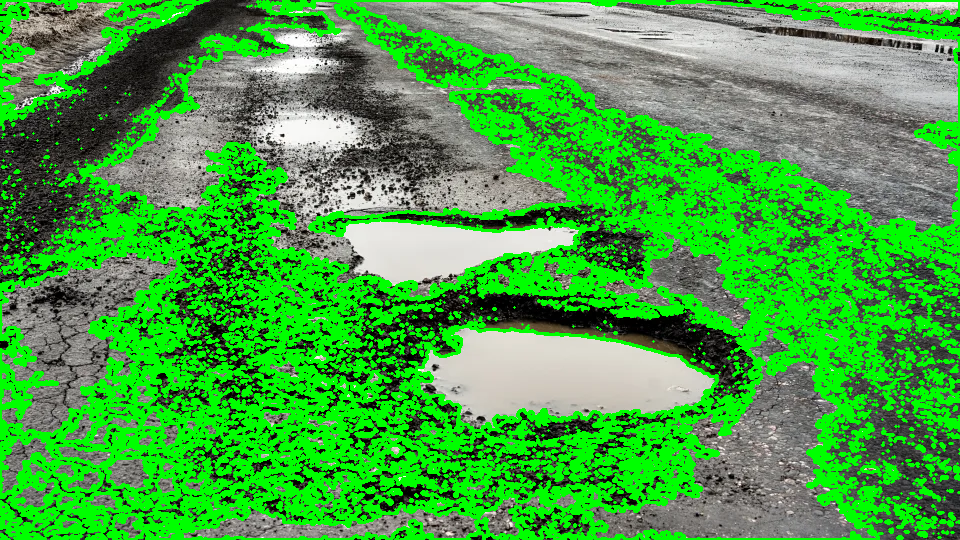

In [ ]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow  # To display images in Colab

# # Mount Google Drive (if your images are stored there)
# from google.colab import drive
# drive.mount('/content/drive')

# Load the images (change the paths accordingly)
image1_path = '/content/pothole1.webp'
image2_path = '/content/pothole2.webp'

image1 = cv2.imread(image1_path)
image2 = cv2.imread(image2_path)

# Convert images to grayscale
gray1 = cv2.cvtColor(image1, cv2.COLOR_BGR2GRAY)
gray2 = cv2.cvtColor(image2, cv2.COLOR_BGR2GRAY)

# Apply segmentation (e.g., using thresholding)
_, thresh1 = cv2.threshold(gray1, 100, 255, cv2.THRESH_BINARY)
_, thresh2 = cv2.threshold(gray2, 100, 255, cv2.THRESH_BINARY)

# Find contours
contours1, _ = cv2.findContours(thresh1, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
contours2, _ = cv2.findContours(thresh2, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Draw contours on original images
cv2.drawContours(image1, contours1, -1, (0, 255, 0), 2)
cv2.drawContours(image2, contours2, -1, (0, 255, 0), 2)

# Display results
cv2_imshow(image1)
cv2_imshow(image2)
cv2.waitKey(0)
cv2.destroyAllWindows()


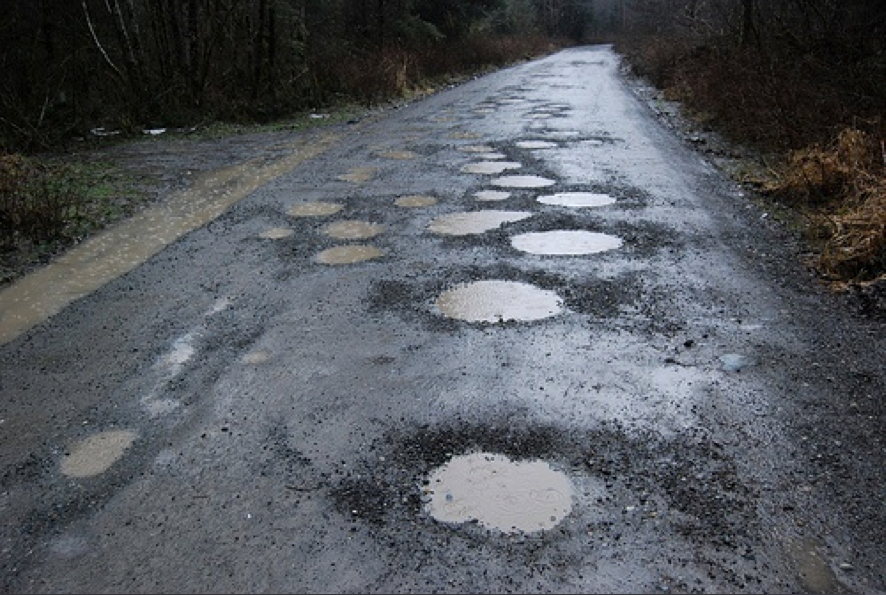

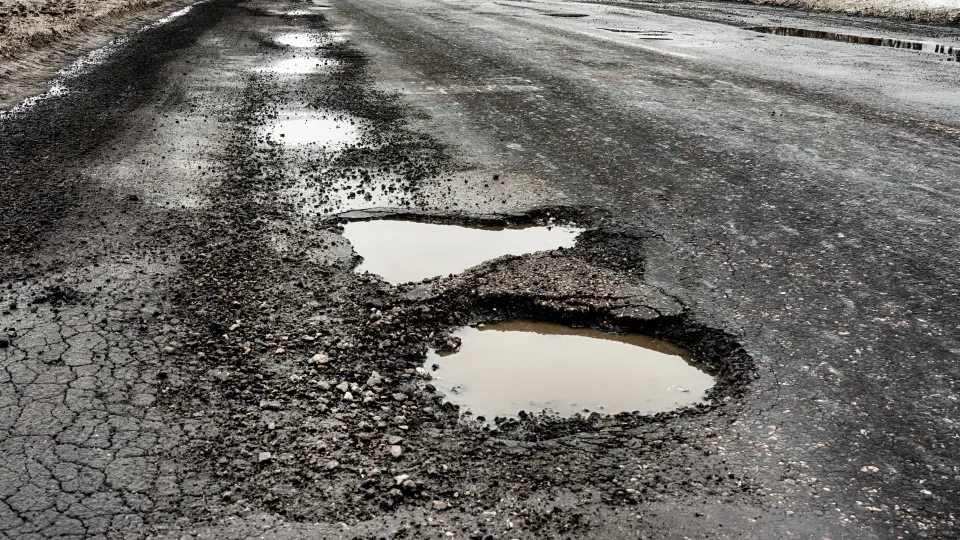

In [ ]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow  # To display images in Colab

# Mount Google Drive (if your images are stored there)
# from google.colab import drive
# drive.mount('/content/drive')

# # Load the images (change the paths accordingly)
# image1_path = '/content/drive/MyDrive/pothole_image1.jpg'
# image2_path = '/content/drive/MyDrive/pothole_image2.jpg'

image1 = cv2.imread(image1_path)
image2 = cv2.imread(image2_path)

# Display original images
cv2_imshow(image1)
cv2_imshow(image2)


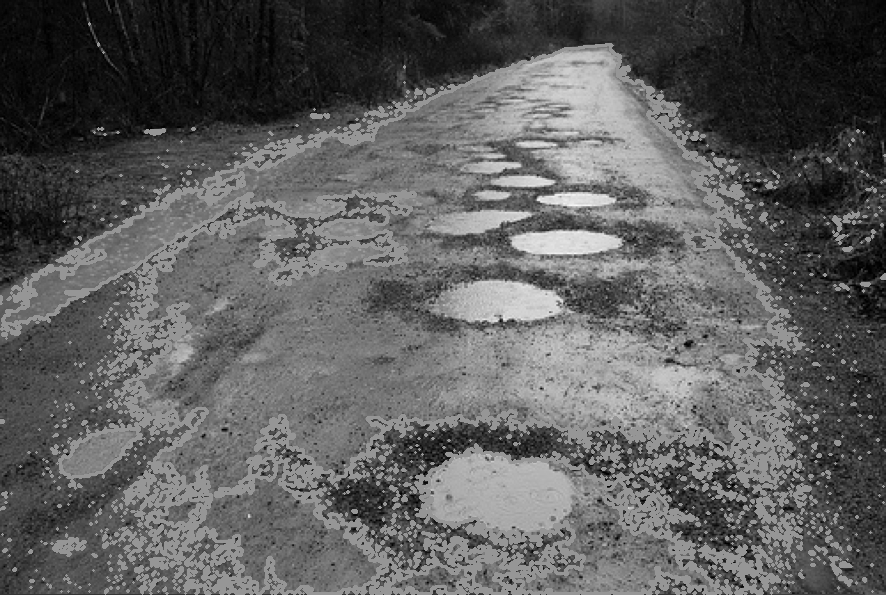

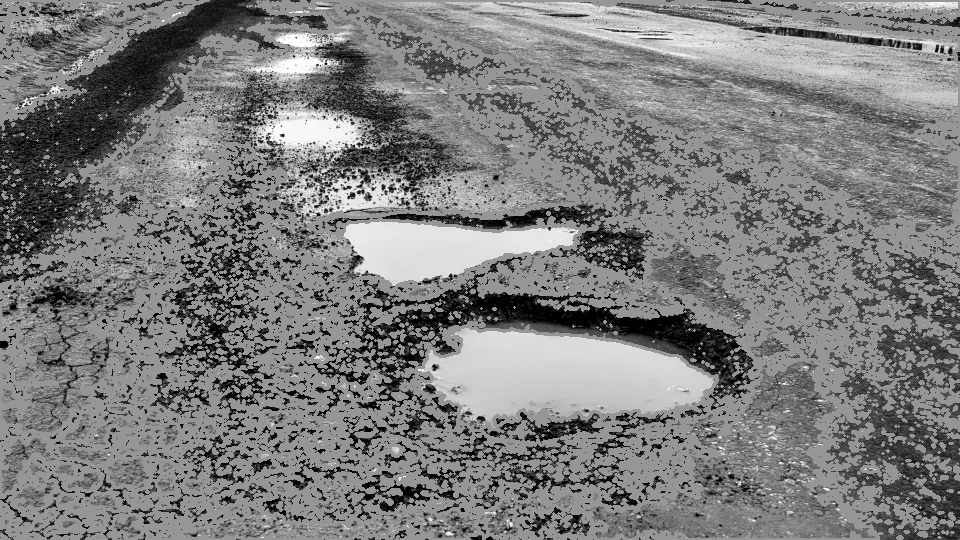

In [ ]:

# Convert images to grayscale and display
gray1 = cv2.cvtColor(image1, cv2.COLOR_BGR2GRAY)
gray2 = cv2.cvtColor(image2, cv2.COLOR_BGR2GRAY)
cv2_imshow(gray1)
cv2_imshow(gray2)


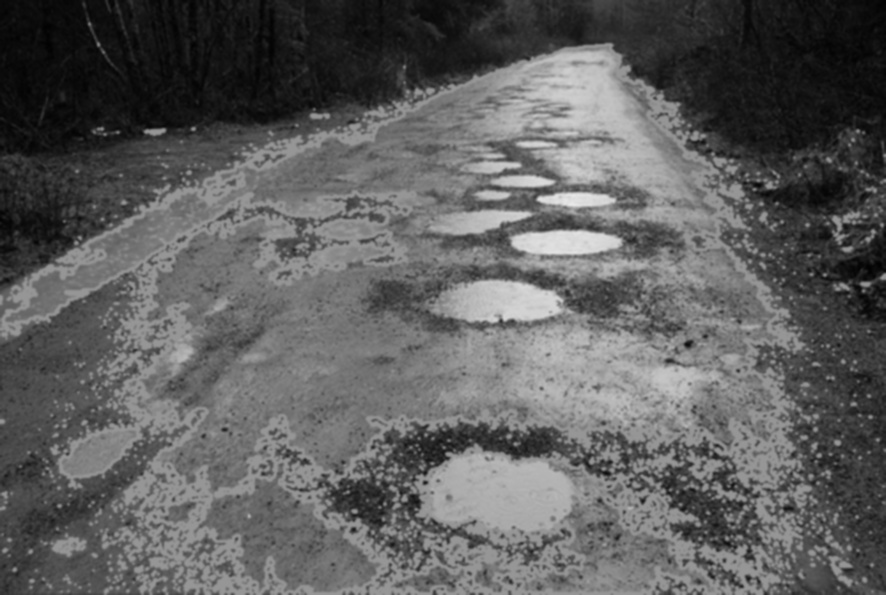

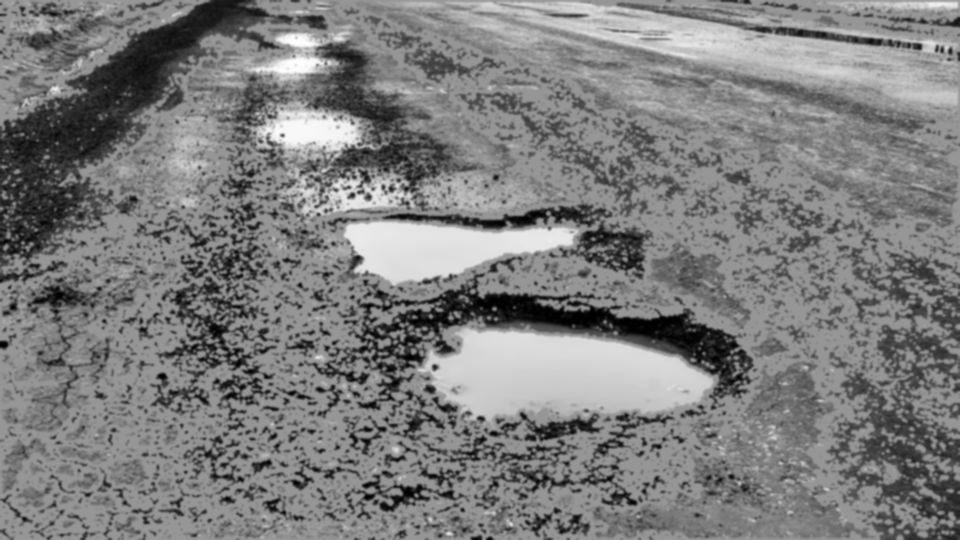

In [ ]:

# Apply Gaussian blur to reduce noise and display
blur1 = cv2.GaussianBlur(gray1, (5, 5), 0)
blur2 = cv2.GaussianBlur(gray2, (5, 5), 0)
cv2_imshow(blur1)
cv2_imshow(blur2)


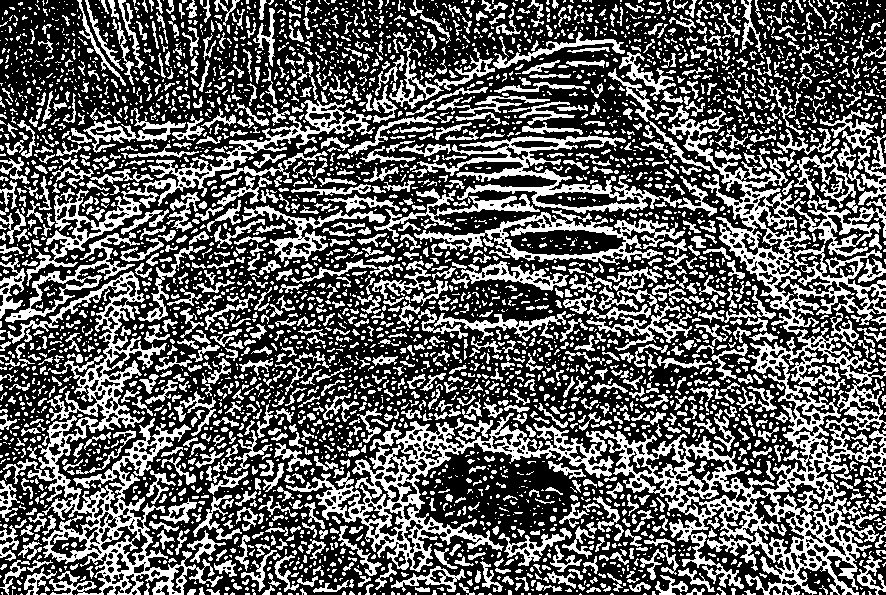

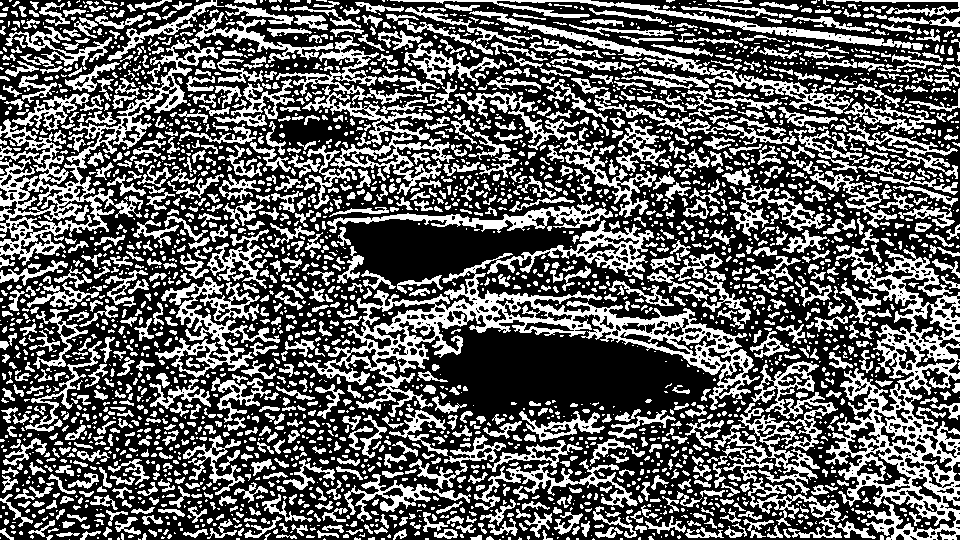

In [ ]:

# Apply adaptive thresholding and display
thresh1 = cv2.adaptiveThreshold(blur1, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY_INV, 11, 2)
thresh2 = cv2.adaptiveThreshold(blur2, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY_INV, 11, 2)
cv2_imshow(thresh1)
cv2_imshow(thresh2)




array([[[  0, 255,   0],
        [  0, 255,   0],
        [  0, 255,   0],
        ...,
        [  0, 255,   0],
        [  0, 255,   0],
        [  0, 255,   0]],

       [[  0, 255,   0],
        [  0, 255,   0],
        [  0, 255,   0],
        ...,
        [  0, 255,   0],
        [  0, 255,   0],
        [  0, 255,   0]],

       [[  0, 255,   0],
        [  0, 255,   0],
        [  0, 255,   0],
        ...,
        [  0, 255,   0],
        [  0, 255,   0],
        [  0, 255,   0]],

       ...,

       [[  0, 255,   0],
        [  0, 255,   0],
        [  0, 255,   0],
        ...,
        [  0, 255,   0],
        [ 57,  59,  61],
        [ 45,  46,  48]],

       [[  0, 255,   0],
        [  0, 255,   0],
        [  0, 255,   0],
        ...,
        [  0, 255,   0],
        [ 67,  68,  70],
        [ 60,  61,  63]],

       [[  0, 255,   0],
        [  0, 255,   0],
        [  0, 255,   0],
        ...,
        [  0, 255,   0],
        [ 79,  81,  83],
        [ 91,  93,  95]]], dtype=uint8)
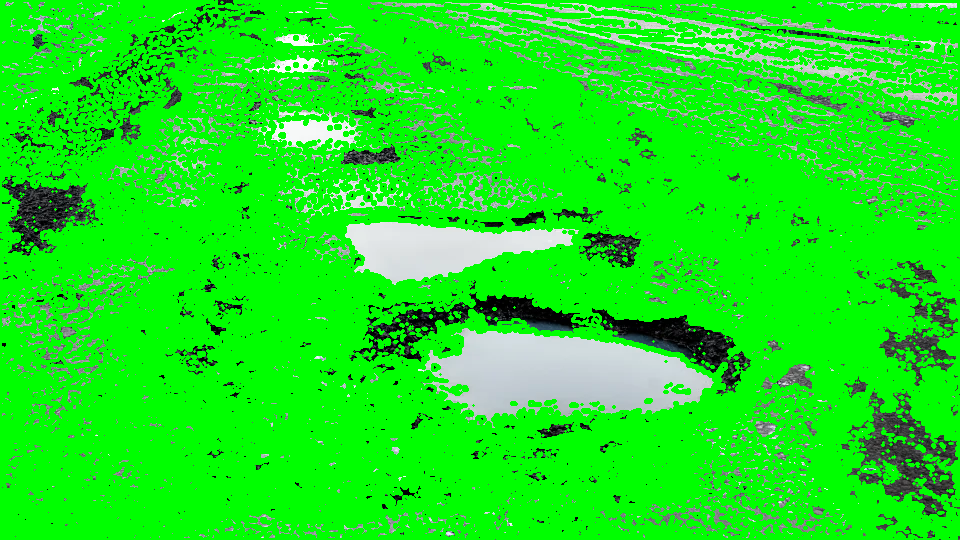

In [ ]:
# Find contours and draw them on the original images
contours1, _ = cv2.findContours(thresh1, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
contours2, _ = cv2.findContours(thresh2, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

cv2.drawContours(image1, contours1, -1, (0, 255, 0), 2)
cv2.drawContours(image2, contours2, -1, (0, 255, 0), 2)


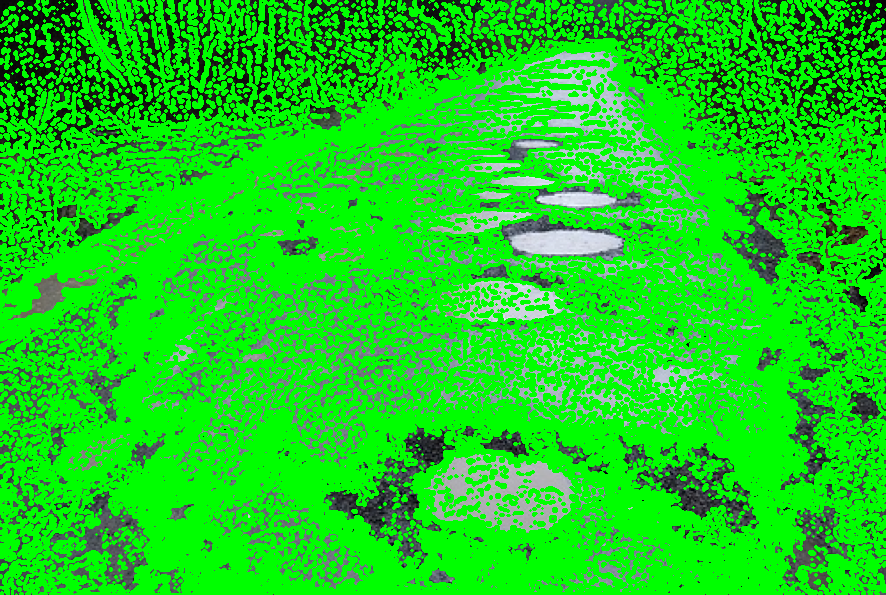

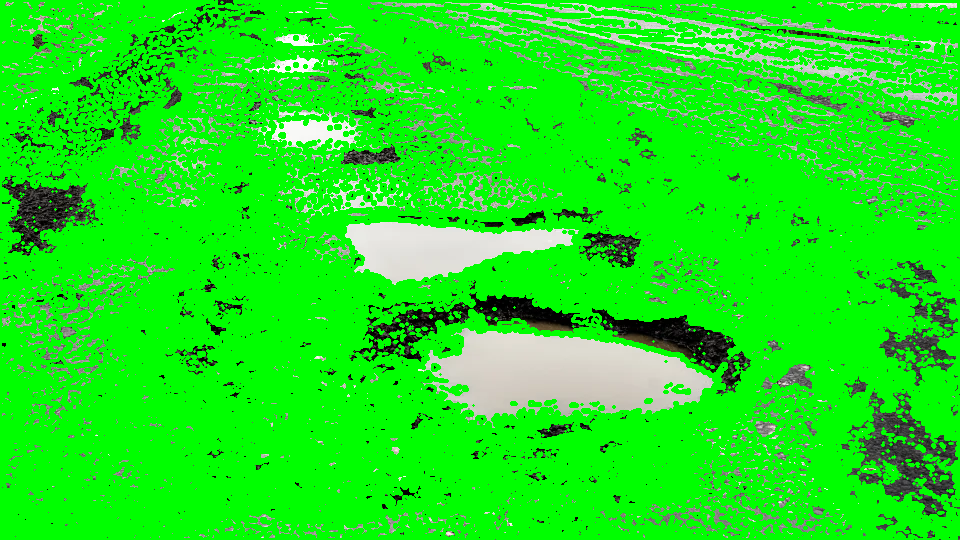

In [ ]:

# Display images with detected contours
cv2_imshow(image1)
cv2_imshow(image2)

cv2.waitKey(0)
cv2.destroyAllWindows()

Comparison Study

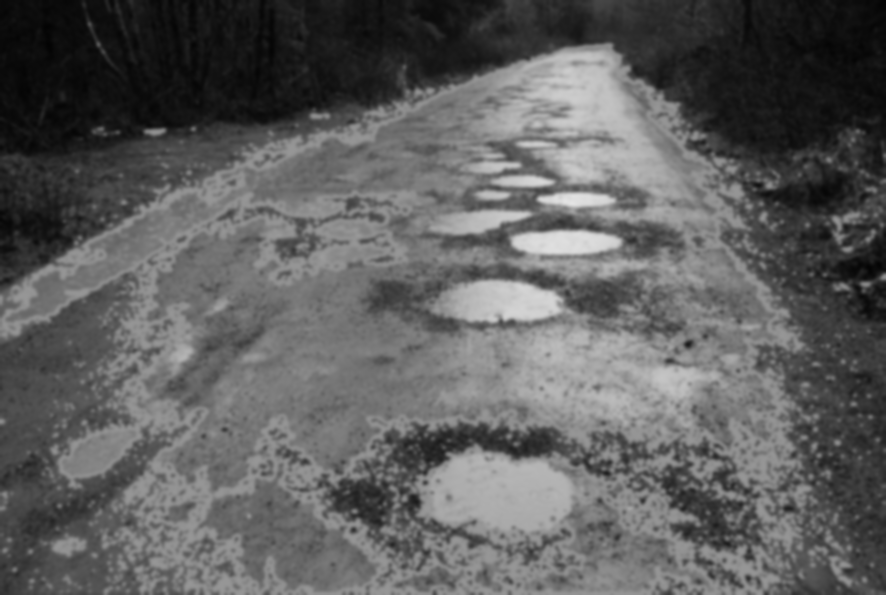

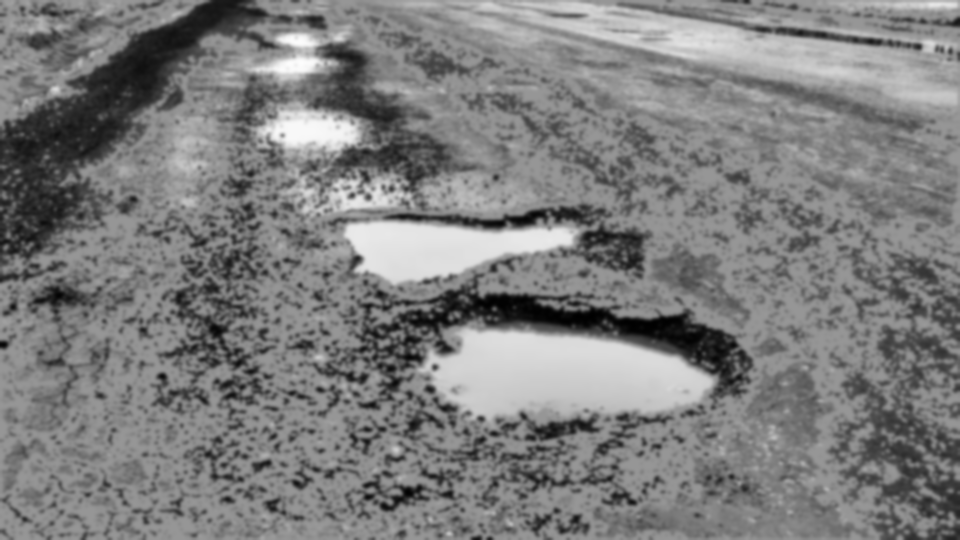

In [ ]:

# Apply Gaussian blur to reduce noise and display
blur3 = cv2.GaussianBlur(gray1, (9, 9), 0)
blur4 = cv2.GaussianBlur(gray2, (9, 9), 0)
cv2_imshow(blur3)
cv2_imshow(blur4)

In [ ]:

# Function to detect potholes
def detect_potholes(image):
    # Find contours in the image
    contours, _ = cv2.findContours(image, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    # Iterate through contours
    pothole_count = 0
    for contour in contours:
        # Calculate contour area
        area = cv2.contourArea(contour)

        # Set threshold area for pothole detection
        min_area_threshold = 100

        # If contour area is above threshold, consider it as a pothole
        if area > min_area_threshold:
            # Draw contour around detected pothole
            cv2.drawContours(image, [contour], -1, (0, 255, 0), 2)
            pothole_count += 1

    return image, pothole_count

In [ ]:
import cv2
import numpy as np

# Function to extract road surface
def extract_road(image):
    # Define region of interest for road surface extraction
    roi_top_left = (0, 184)  # Adjusted top-left y-coordinate
    roi_bottom_right = (274, 300)  # Adjusted bottom-right y-coordinate

    # Check if the ROI coordinates are within the bounds of the image
    if (roi_top_left[0] < roi_bottom_right[0]) and (roi_top_left[1] < roi_bottom_right[1]):
        # Crop image to the region of interest
        road_roi = image[roi_top_left[1]:roi_bottom_right[1], roi_top_left[0]:roi_bottom_right[0]]

        print("ROI Shape:", road_roi.shape)  # Print ROI shape for debugging

        # Convert image to grayscale
        gray = cv2.cvtColor(road_roi, cv2.COLOR_BGR2GRAY)

        # Apply Gaussian blur to reduce noise
        blurred = cv2.GaussianBlur(gray, (5, 5), 0)

        # Apply Canny edge detection
        edges = cv2.Canny(blurred, 50, 150)

        # Perform dilation to close gaps in edges
        kernel = np.ones((5,5), np.uint8)
        dilated_edges = cv2.dilate(edges, kernel, iterations=1)

        return dilated_edges
    else:
        print("Error: Invalid ROI coordinates.")
        return None


In [ ]:
import cv2
import numpy as np

# Function to extract road surface
def extract_road(image):
    # Define region of interest for road surface extraction
    roi_top_left = (0, 184)  # Adjusted top-left y-coordinate
    roi_bottom_right = (274, 300)  # Adjusted bottom-right y-coordinate

    # Get image dimensions
    image_height, image_width, _ = image.shape

    # Check if the ROI coordinates are within the bounds of the image
    if (roi_top_left[0] >= 0 and roi_top_left[1] >= 0 and
        roi_bottom_right[0] <= image_width and roi_bottom_right[1] <= image_height):

        # Crop image to the region of interest
        road_roi = image[roi_top_left[1]:roi_bottom_right[1], roi_top_left[0]:roi_bottom_right[0]]

        print("ROI Shape:", road_roi.shape)  # Print ROI shape for debugging

        # Convert image to grayscale
        gray = cv2.cvtColor(road_roi, cv2.COLOR_BGR2GRAY)

        # Apply Gaussian blur to reduce noise
        blurred = cv2.GaussianBlur(gray, (5, 5), 0)

        # Apply Canny edge detection
        edges = cv2.Canny(blurred, 50, 150)

        # Perform dilation to close gaps in edges
        kernel = np.ones((5,5), np.uint8)
        dilated_edges = cv2.dilate(edges, kernel, iterations=1)

        return dilated_edges
    else:
        print("Error: Invalid ROI coordinates or out of image bounds.")
        return None


In [ ]:
# Install required libraries
!pip install opencv-python-headless


In [ ]:

import cv2
from google.colab.patches import cv2_imshow

# Function to detect potholes in an image
def detect_potholes(image):
    # Convert the image to grayscale
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Apply Gaussian blur to reduce noise
    blurred = cv2.GaussianBlur(gray, (5, 5), 0)

    # Apply Canny edge detection
    edges = cv2.Canny(blurred, 50, 150)

    # Find contours in the edge-detected image
    contours, _ = cv2.findContours(edges.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    # Iterate through detected contours
    for contour in contours:
        # Calculate contour area
        area = cv2.contourArea(contour)
        # Set minimum area threshold to classify as a pothole (you may need to adjust this)
        if area > 100:
            # Draw bounding box around detected pothole
            x, y, w, h = cv2.boundingRect(contour)
            cv2.rectangle(image, (x, y), (x + w, y + h), (0, 255, 0), 2)
            # You can also perform further analysis or processing on the detected pothole

    # Return the original image with bounding boxes drawn around detected potholes
    return image
from IPython.display import Image



# Capture image using camera (you can use your own image for testing)
image = cv2.imread('/content/pothole1.webp')
# Detect potholes in the image
result_image = detect_potholes(image)

# Save the result image to a file
cv2.imwrite('pothole_detection_result.jpg', result_image)

# Display the saved image
Image('pothole_detection_result.jpg')

# Display the result
# cv2.imshow('Pothole Detection Result', result_image)
cv2.waitKey(0)
cv2.destroyAllWindows()


error: OpenCV(4.8.0) /io/opencv/modules/imgproc/src/color.cpp:182: error: (-215:Assertion failed) !_src.empty() in function 'cvtColor'


In [ ]:
import cv2
import matplotlib.pyplot as plt

# Load the image using OpenCV
result_image = cv2.imread("/content/pothole_detection_result.jpg")

# Display the image using matplotlib
plt.imshow(cv2.cvtColor(result_image, cv2.COLOR_BGR2RGB))
plt.axis('off')  # Turn off axis labels
plt.show()


In [ ]:
# import cv2
# import numpy as np
# from matplotlib import pyplot as plt

# # Function to detect potholes
# def detect_potholes(image):
#     # Convert image to grayscale
#     gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

#     # Apply Gaussian blur to reduce noise
#     blurred = cv2.GaussianBlur(gray, (5, 5), 0)

#     # Apply Canny edge detection
#     edges = cv2.Canny(blurred, 50, 150)

#     # Perform dilation to close gaps in edges
#     kernel = np.ones((5,5), np.uint8)
#     dilated_edges = cv2.dilate(edges, kernel, iterations=3)

#     # Find contours in the dilated image
#     contours, _ = cv2.findContours(dilated_edges, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

#     # Draw contours on the original image
#     result = image.copy()
#     pothole_count = 0
#     for contour in contours:
#         # Calculate contour area
#         area = cv2.contourArea(contour)

#         # Set threshold area for pothole detection
#         min_area_threshold = 100

#         # If contour area is above threshold, consider it as a pothole
#         if area > min_area_threshold:
#             # Draw contour around detected pothole
#             cv2.drawContours(result, [contour], -1, (0, 255, 0), 2)
#             pothole_count += 1

#     return result, pothole_count

# # Load image (replace 'image_path' with the path to your image)
# image_path = '/content/pothole2.jpg'
# image = cv2.imread(image_path)

# # Detect potholes
# result, pothole_count = detect_potholes(image)

# # Display result using matplotlib
# plt.imshow(cv2.cvtColor(result, cv2.COLOR_BGR2RGB))
# plt.title('Detection Result')
# plt.axis('off')
# plt.show()

# print("Total number of obstacle detected:", pothole_count)


In [ ]:
# Code 2

import cv2
import numpy as np
from google.colab.patches import cv2_imshow  # To display images in Colab

# Mount Google Drive (if your images are stored there)
# from google.colab import drive
# drive.mount('/content/drive')

# # Load the images (change the paths accordingly)
# image1_path = '/content/drive/MyDrive/pothole_image1.jpg'
# image2_path = '/content/drive/MyDrive/pothole_image2.jpg'

image1 = cv2.imread(image1_path)
image2 = cv2.imread(image2_path)

# Display original images
cv2_imshow(image1)
cv2_imshow(image2)


# Convert images to grayscale and display
gray1 = cv2.cvtColor(image1, cv2.COLOR_BGR2GRAY)
gray2 = cv2.cvtColor(image2, cv2.COLOR_BGR2GRAY)
cv2_imshow(gray1)
cv2_imshow(gray2)


# Apply Gaussian blur to reduce noise and display
blur1 = cv2.GaussianBlur(gray1, (5, 5), 0)
blur2 = cv2.GaussianBlur(gray2, (5, 5), 0)
cv2_imshow(blur1)
cv2_imshow(blur2)

# Apply adaptive thresholding and display
thresh1 = cv2.adaptiveThreshold(blur1, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY_INV, 11, 2)
thresh2 = cv2.adaptiveThreshold(blur2, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY_INV, 11, 2)
cv2_imshow(thresh1)
cv2_imshow(thresh2)

# Find contours and draw them on the original images
contours1, _ = cv2.findContours(thresh1, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
contours2, _ = cv2.findContours(thresh2, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

cv2.drawContours(image1, contours1, -1, (0, 255, 0), 2)
cv2.drawContours(image2, contours2, -1, (0, 255, 0), 2)


# Display images with detected contours
cv2_imshow(image1)
cv2_imshow(image2)

cv2.waitKey(0)
cv2.destroyAllWindows()


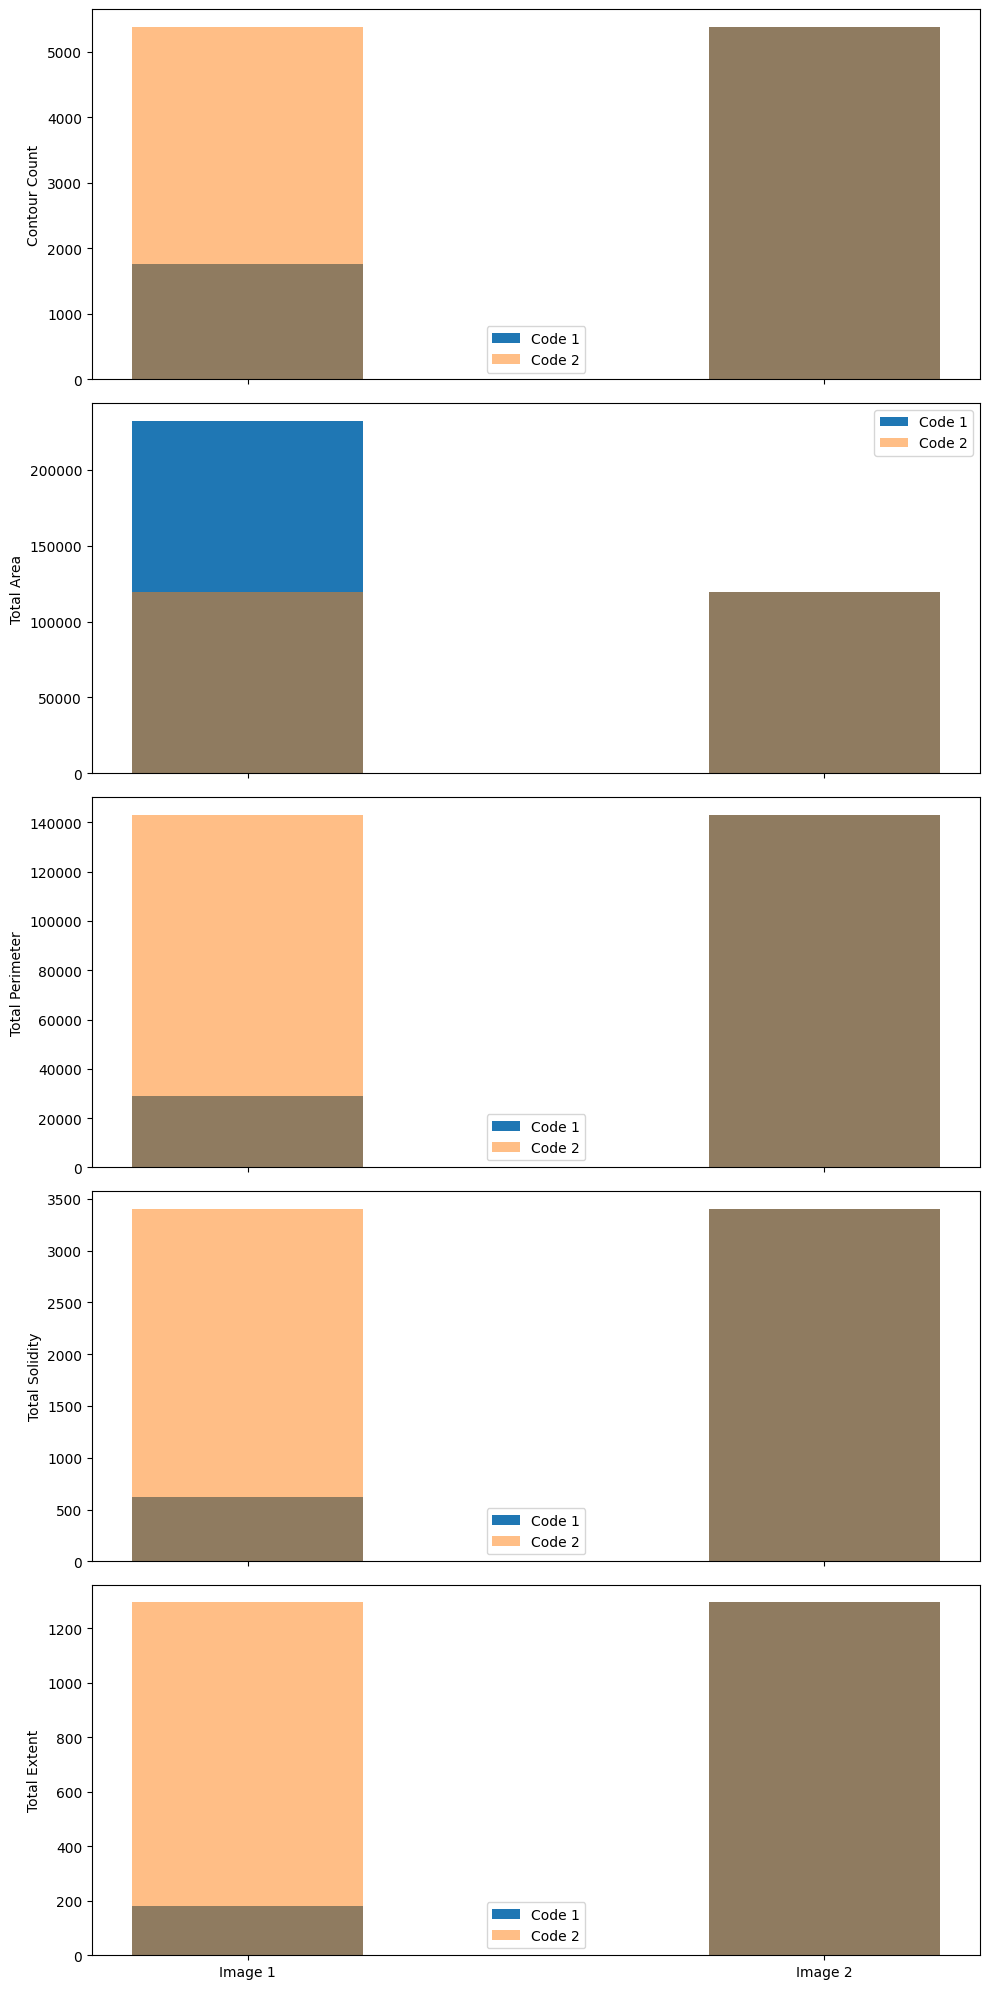

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load and process images with Code 1
image1_path_code1 = '/content/pothole1.webp'
image2_path_code1 = '/content/pothole2.webp'

image1_code1 = cv2.imread(image1_path_code1)
image2_code1 = cv2.imread(image2_path_code1)

gray1_code1 = cv2.cvtColor(image1_code1, cv2.COLOR_BGR2GRAY)
gray2_code1 = cv2.cvtColor(image2_code1, cv2.COLOR_BGR2GRAY)

_, thresh1_code1 = cv2.threshold(gray1_code1, 100, 255, cv2.THRESH_BINARY)
_, thresh2_code1 = cv2.threshold(gray2_code1, 100, 255, cv2.THRESH_BINARY)

contours1_code1, _ = cv2.findContours(thresh1_code1, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
contours2_code1, _ = cv2.findContours(thresh2_code1, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Load and process images with Code 2
image1_path_code2 = '/content/pothole1.webp'
image2_path_code2 = '/content/pothole1.webp'

image1_code2 = cv2.imread(image1_path_code2)
image2_code2 = cv2.imread(image2_path_code2)

gray1_code2 = cv2.cvtColor(image1_code2, cv2.COLOR_BGR2GRAY)
gray2_code2 = cv2.cvtColor(image2_code2, cv2.COLOR_BGR2GRAY)

blur1_code2 = cv2.GaussianBlur(gray1_code2, (5, 5), 0)
blur2_code2 = cv2.GaussianBlur(gray2_code2, (5, 5), 0)

thresh1_code2 = cv2.adaptiveThreshold(blur1_code2, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY_INV, 11, 2)
thresh2_code2 = cv2.adaptiveThreshold(blur2_code2, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY_INV, 11, 2)

contours1_code2, _ = cv2.findContours(thresh1_code2, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
contours2_code2, _ = cv2.findContours(thresh2_code2, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

def calculate_metrics(contours):
    contour_count = len(contours)
    total_area = sum(cv2.contourArea(contour) for contour in contours)
    total_perimeter = sum(cv2.arcLength(contour, True) for contour in contours)

    # Calculate solidity while skipping contours with zero convex hull area
    total_solidity = 0
    for contour in contours:
        hull_area = cv2.contourArea(cv2.convexHull(contour))
        if hull_area > 0:
            total_solidity += cv2.contourArea(contour) / hull_area

    total_extent = sum(cv2.contourArea(contour) / (cv2.boundingRect(contour)[2] * cv2.boundingRect(contour)[3]) for contour in contours)
    return contour_count, total_area, total_perimeter, total_solidity, total_extent


# Plotting
labels = ['Contour Count', 'Total Area', 'Total Perimeter', 'Total Solidity', 'Total Extent']
# Calculate metrics
metrics_code1 = calculate_metrics(contours1_code1)
metrics_code2 = calculate_metrics(contours1_code2), calculate_metrics(contours2_code2)

num_metrics = len(labels)

fig, ax = plt.subplots(num_metrics, 1, figsize=(10, 20), sharex=True)

for i in range(num_metrics):
    ax[i].bar(['Image 1', 'Image 2'], [metrics_code1[i], metrics_code2[0][i]], width=0.4, label='Code 1')
    ax[i].bar(['Image 1', 'Image 2'], [metrics_code2[0][i], metrics_code2[1][i]], width=0.4, label='Code 2', alpha=0.5)
    ax[i].set_ylabel(labels[i])
    ax[i].legend()

plt.tight_layout()
plt.show()



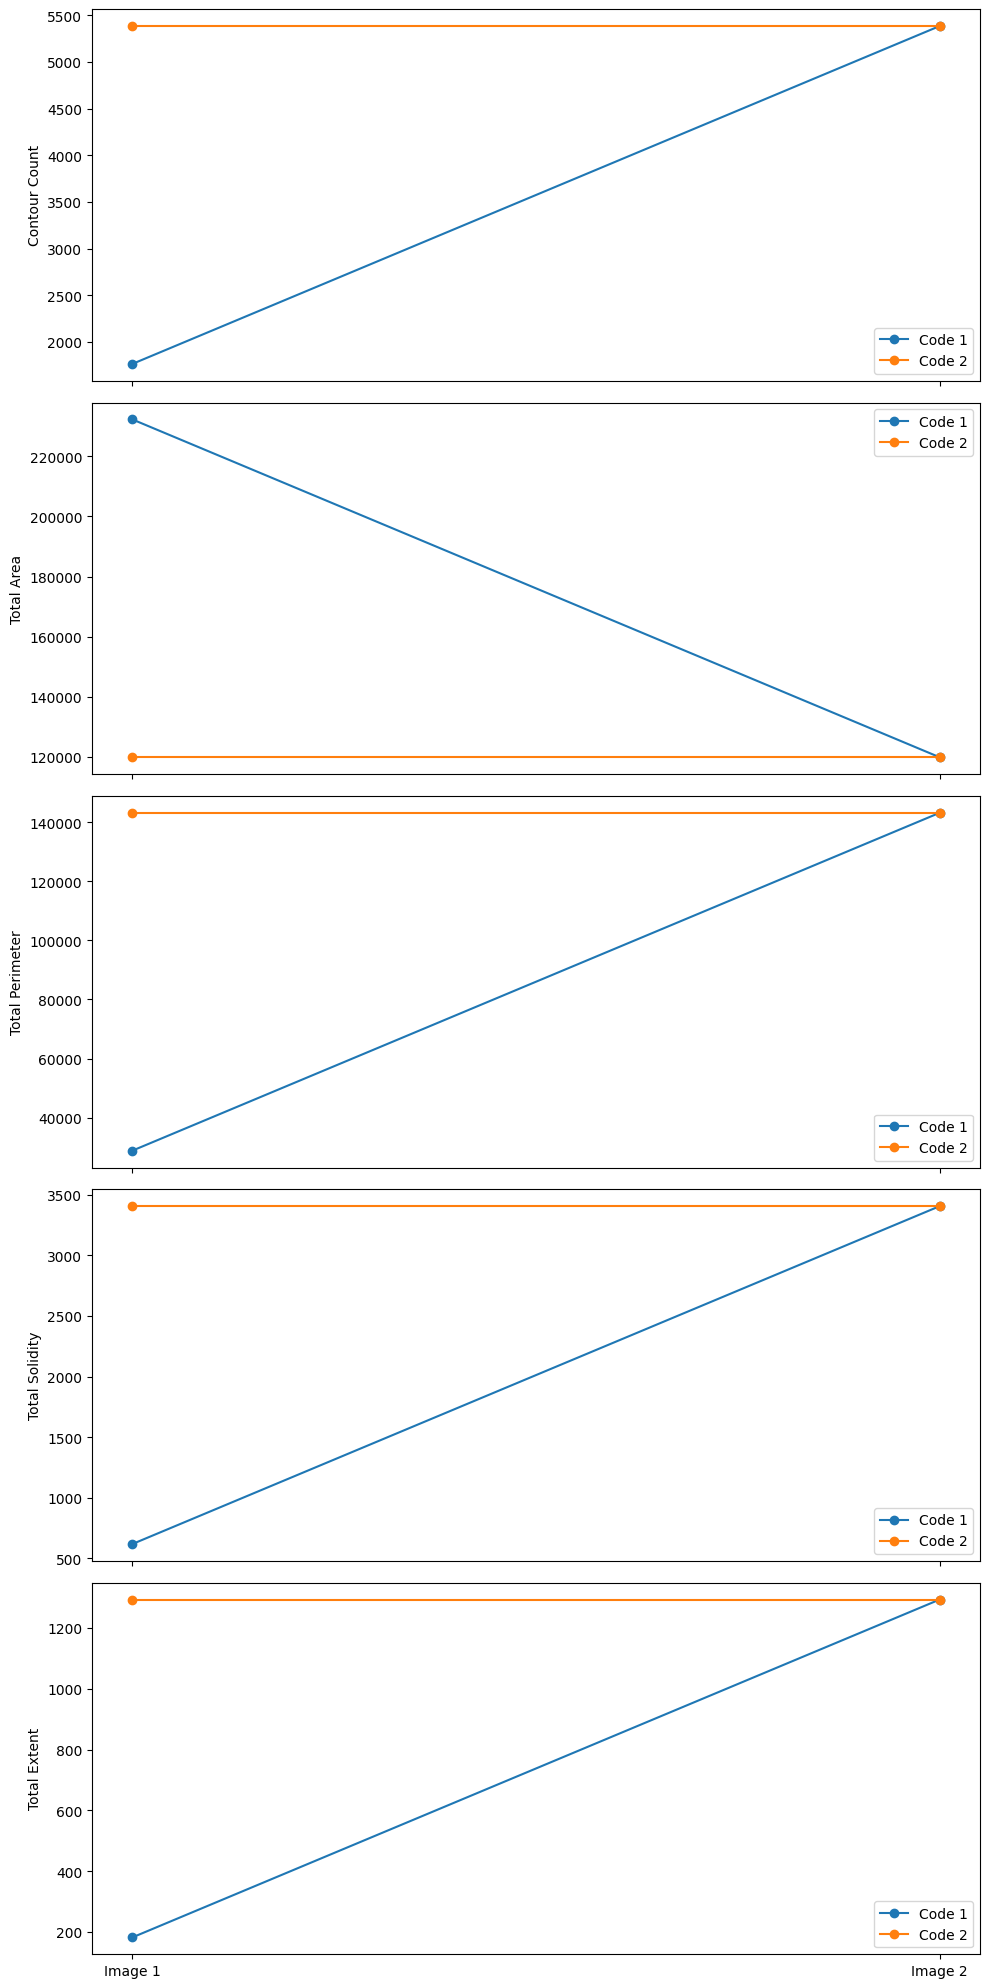

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load and process images with Code 1
image1_path_code1 = '/content/pothole1.webp'
image2_path_code1 = '/content/pothole2.webp'

image1_code1 = cv2.imread(image1_path_code1)
image2_code1 = cv2.imread(image2_path_code1)

gray1_code1 = cv2.cvtColor(image1_code1, cv2.COLOR_BGR2GRAY)
gray2_code1 = cv2.cvtColor(image2_code1, cv2.COLOR_BGR2GRAY)

_, thresh1_code1 = cv2.threshold(gray1_code1, 100, 255, cv2.THRESH_BINARY)
_, thresh2_code1 = cv2.threshold(gray2_code1, 100, 255, cv2.THRESH_BINARY)

contours1_code1, _ = cv2.findContours(thresh1_code1, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
contours2_code1, _ = cv2.findContours(thresh2_code1, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Load and process images with Code 2
image1_path_code2 = '/content/pothole1.webp'
image2_path_code2 = '/content/pothole1.webp'

image1_code2 = cv2.imread(image1_path_code2)
image2_code2 = cv2.imread(image2_path_code2)

gray1_code2 = cv2.cvtColor(image1_code2, cv2.COLOR_BGR2GRAY)
gray2_code2 = cv2.cvtColor(image2_code2, cv2.COLOR_BGR2GRAY)

blur1_code2 = cv2.GaussianBlur(gray1_code2, (5, 5), 0)
blur2_code2 = cv2.GaussianBlur(gray2_code2, (5, 5), 0)

thresh1_code2 = cv2.adaptiveThreshold(blur1_code2, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY_INV, 11, 2)
thresh2_code2 = cv2.adaptiveThreshold(blur2_code2, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY_INV, 11, 2)

contours1_code2, _ = cv2.findContours(thresh1_code2, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
contours2_code2, _ = cv2.findContours(thresh2_code2, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

def calculate_metrics(contours):
    contour_count = len(contours)
    total_area = sum(cv2.contourArea(contour) for contour in contours)
    total_perimeter = sum(cv2.arcLength(contour, True) for contour in contours)

    # Calculate solidity while skipping contours with zero convex hull area
    total_solidity = 0
    for contour in contours:
        hull_area = cv2.contourArea(cv2.convexHull(contour))
        if hull_area > 0:
            total_solidity += cv2.contourArea(contour) / hull_area

    total_extent = sum(cv2.contourArea(contour) / (cv2.boundingRect(contour)[2] * cv2.boundingRect(contour)[3]) for contour in contours)
    return contour_count, total_area, total_perimeter, total_solidity, total_extent


# Plotting
labels = ['Contour Count', 'Total Area', 'Total Perimeter', 'Total Solidity', 'Total Extent']
# Calculate metrics
metrics_code1 = calculate_metrics(contours1_code1)
metrics_code2 = calculate_metrics(contours1_code2), calculate_metrics(contours2_code2)

num_metrics = len(labels)

fig, ax = plt.subplots(num_metrics, 1, figsize=(10, 20), sharex=True)

for i in range(num_metrics):
    ax[i].plot(['Image 1', 'Image 2'], [metrics_code1[i], metrics_code2[0][i]], marker='o', label='Code 1')
    ax[i].plot(['Image 1', 'Image 2'], [metrics_code2[0][i], metrics_code2[1][i]], marker='o', label='Code 2')
    ax[i].set_ylabel(labels[i])
    ax[i].legend()

plt.tight_layout()
plt.show()


